# Chapter: Support Vector Machines & Kernel Methods


# Topic: SVDD One-Class Classification

In [1]:
# read data
import numpy as np

X = np.loadtxt('SVDD_toyDataset.csv', delimiter=',')

In [2]:
# compute bandwidth via modified mean criteria
import scipy.spatial

N = X.shape[0]
phi = 1/np.log(N-1)
delta = -0.14818008*np.power(phi,4) + 0.2846623624*np.power(phi,3) - 0.252853808*np.power(phi,2) + 0.159059498*phi - 0.001381145
D2 = np.sum(scipy.spatial.distance.pdist(X, 'sqeuclidean'))/(N*(N-1)/2) # pdist computes pairwise distances between observations 
sigma = np.sqrt(D2/np.log((N-1)/delta*delta))
gamma = 1/(2*sigma*sigma)

In [3]:
# fit SVM model
from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.01, gamma=5)
model.fit(X) 

OneClassSVM(gamma=5, nu=0.01)

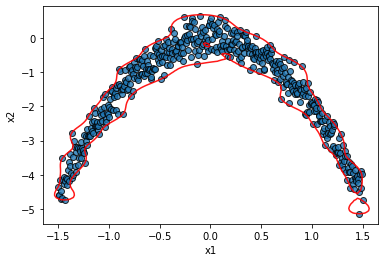

In [4]:
# plot SVM boundaries
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')

# get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and supporting planes
ax.contour(XX, YY, Z, levels=[0], alpha=0.9, linestyles=['-'], colors=['red'])
plt.show()
